<a href="https://colab.research.google.com/github/Mahziyar-Yz/BitcoinModel-MachineLearning/blob/main/btc_model_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**imports library**

In [76]:
!pip install yfinance

import time
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
# from sklearn.metrics import root_mean_squared_error

**Data Extraction & Analysis & Visnalize**

[*********************100%***********************]  1 of 1 completed


shape :  (3528, 6)
dim :  2
clumns:  ['Open' 'High' 'Low' 'Close' 'Adj Close' 'Volume']
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  320.434998  320.434998  314.002991  314.248993  314.248993   
2015-01-02  314.079010  315.838989  313.565002  315.032013  315.032013   
2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   

              Volume  
Date                  
2015-01-01   8036550  
2015-01-02   7860650  
2015-01-03  33054400  
2015-01-04  55629100  
2015-01-05  43962800  
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

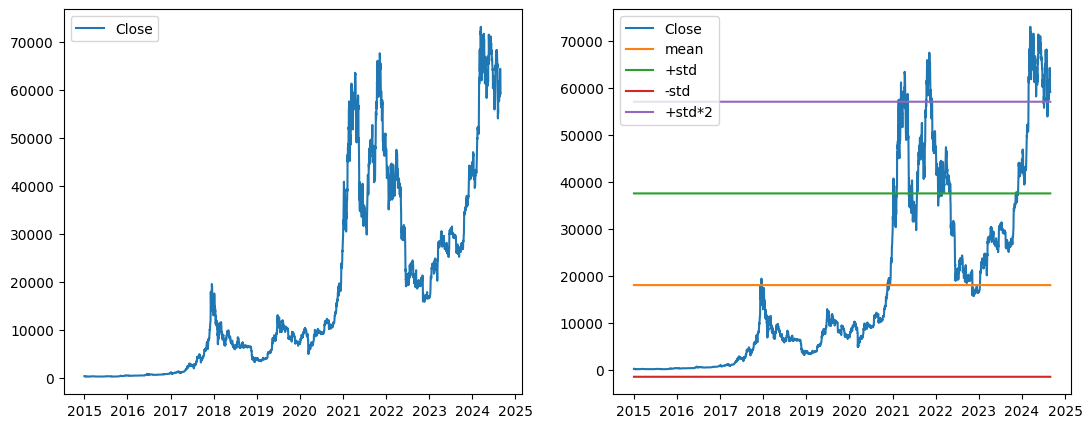

In [77]:
btc = yf.download("BTC-USD",start="2015-01-01")
print("shape : ",btc.shape)
print("dim : ",btc.ndim)
print("clumns: ",btc.columns.values)
print("|"*150)

print(btc.head(5))
print("|"*150)

print(btc.info())
print("|"*150)

print(btc.describe())
print("|"*150)

close=btc["Close"]

mean=close.mean()
std=close.std()

close_mean=np.full_like(close,mean)
close_std=np.full_like(close,std)

fig=plt.figure(figsize=(13,5))

ax=fig.add_subplot(121)
ax.plot(btc.index,btc["Close"],label="Close")
plt.legend()

ax2=fig.add_subplot(122)
ax2.plot(btc.index,btc["Close"],label="Close")
ax2.plot(btc.index,close_mean,label="mean")
ax2.plot(btc.index,(close_mean+close_std),label="+std")
ax2.plot(btc.index,(close_mean-close_std),label="-std")
ax2.plot(btc.index,(close_mean+(close_std*2)),label="+std*2")
plt.legend()

plt.show()

**Feature extraction & Normalization & Visnalize**

shape :  (3527, 10)
ndim 2
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  320.434998  320.434998  314.002991  314.248993  314.248993   
2015-01-02  314.079010  315.838989  313.565002  315.032013  315.032013   
2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   

              Volume    Benefit  Tolerance  Profit-Loss  Close-Tomorrow  
Date                                                                     
2015-01-01   8036550  -6.186005   6.432007            0      315.032013  
2015-01-02   7860650   0.953003   2.273987            1      281.082001  
2015-01-03  33054400 -33.764008  34.067993            0      264.195007  
2015-01-04  55629100 -16.950989  29.618011            0      274.473999  
2015-01-05

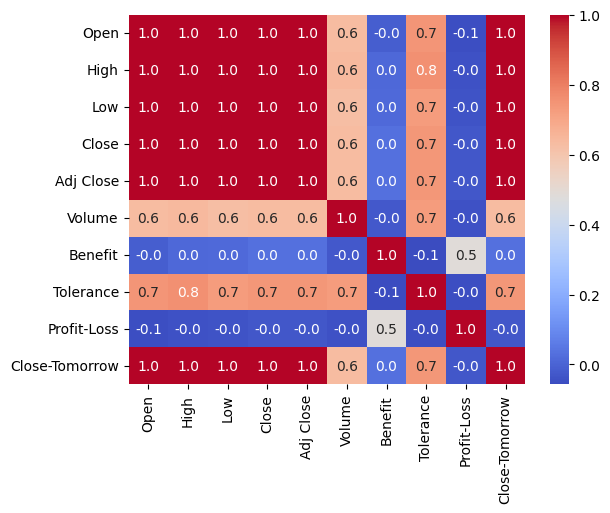

In [78]:
btc["Benefit"]=btc["Close"]-btc["Open"]
btc["Tolerance"]=btc["High"]-btc["Low"]
btc["Profit-Loss"]=btc["Benefit"].apply(lambda a:0 if a<0 else 1)
btc["Close-Tomorrow"]=btc["Close"].shift(-1)
btc.dropna(inplace=True)

print("shape : ",btc.shape)
print("ndim",btc.ndim )
print(btc.head(5))
print("|"*150)

print(btc.info())
print("|"*150)

print(btc.corr())
print("|"*150)

sns.heatmap(btc.corr(),annot=True,fmt=".1f",cmap="coolwarm")
plt.show()

btc_new=btc[["Open","High","Low","Close","Adj Close","Volume","Tolerance","Close-Tomorrow"]]

**Overview of the new data**

In [79]:
btc_new

,Open,High,Low,Close,Adj Close,Volume,Tolerance,Close-Tomorrow
Date,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,6.432007,315.032013
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2.273987,281.082001
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,34.067993,264.195007
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,29.618011,274.473999
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,13.256989,286.188995
...,...,...,...,...,...,...,...,...
2024-08-23,60380.953125,64947.062500,60372.050781,64094.355469,64094.355469,42530509233,4575.011719,64178.992188
2024-08-24,64103.871094,64513.789062,63619.917969,64178.992188,64178.992188,21430585163,893.871094,64333.542969
2024-08-25,64176.367188,64996.421875,63833.519531,64333.542969,64333.542969,18827683555,1162.902344,62880.660156


**Building and testing the models for LinearRegression , Lasso , Ridge**

LinearRegression :
score:  0.9956422658391255
time:  0.003902912139892578
slop: [ 1.12243565e-01 -9.60947934e-02 -9.90695687e-02  5.39870023e-01
  5.39870023e-01  1.47744961e-09  2.97477555e-03]
intercept: 16.733064722142444
------------------------------------------------------------------------------------------------------------------------------------------------------
pred a value in date Aug 27, 2024:  59564.66545448391
real answer in date Aug 28, 2024: 59056.45
--------------------------------------------
y_test_pred:  [19377.1837877  18945.4569707  18788.40749988 19242.78831876
 19071.0657615  19488.68437293 19636.53834871 19421.3954176
 19301.87248824]
y_test:  [18937.01171875 18802.09765625 19222.671875   19110.546875
 19426.72070312 19573.05078125 19431.7890625  19312.09570312
 19044.10742188]
------------------------------------------------------------------------------------------------------------------------------------------------------
rmse_test: 1165.6917599901587
rms

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


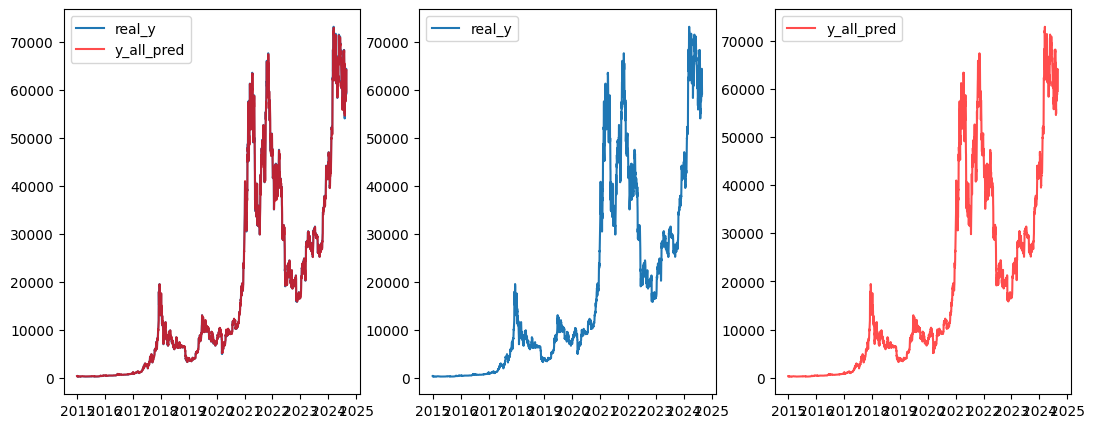

next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-
Lasso :
score:  0.9957720414079833
time:  0.019450902938842773
slop: [-5.24250693e-02  4.87342054e-01 -3.21630185e-02  5.93083448e-01
  4.95530654e-14  1.56029153e-09 -2.14511308e-01]
intercept: 14.460142757869107
-----------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.826e+08, tolerance: 7.730e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


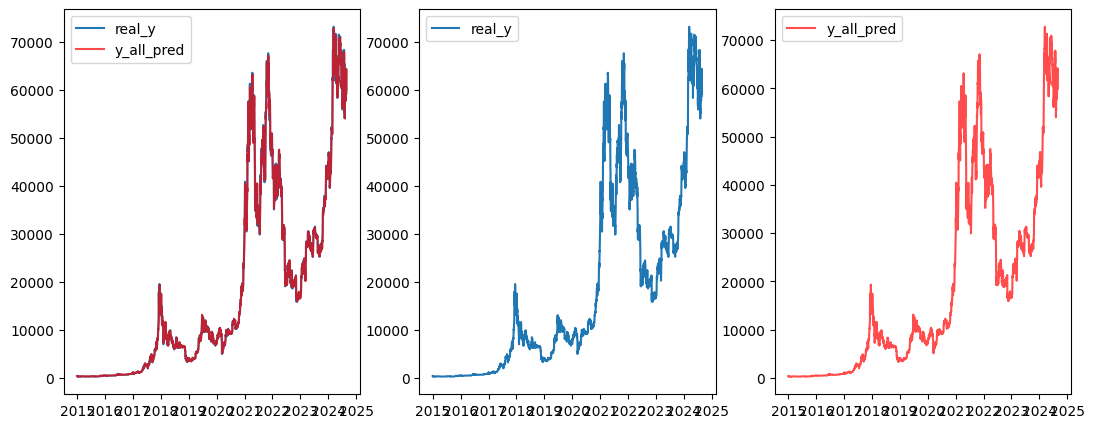

next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-
Ridge :
score:  0.99564226584072
time:  0.004592418670654297
slop: [ 1.12243563e-01 -9.59707967e-02 -9.91935616e-02  5.39728302e-01
  5.40011741e-01  1.47744963e-09  2.85078110e-03]
intercept: 16.73306409300676
--------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.87262e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


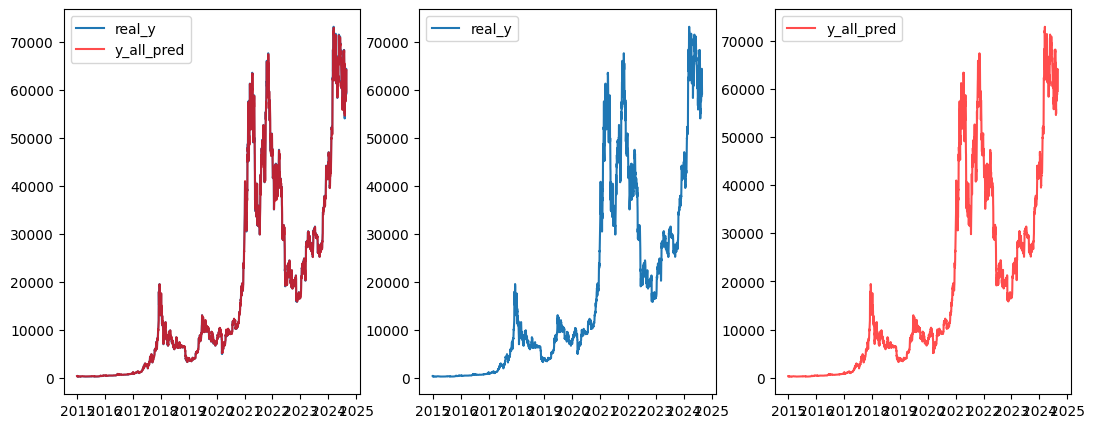

next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-next-


In [80]:
x=btc_new[["Open","High","Low","Close","Adj Close","Volume","Tolerance"]]
y=btc_new["Close-Tomorrow"]

x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=0.2,shuffle=False)
result=[]
for model in [LinearRegression(),Lasso(),Ridge()] :

        print(str(model).replace("(","").replace(")",""),":")

        start= time.time()

        model=model
        model.fit(x_train,y_train)

        end=time.time()

        print("score: ",model.score(x_test,y_test))
        print("time: ",end-start)
        print("slop:",model.coef_)
        print("intercept:",model.intercept_)
        print("-"*150)

        y_test_pred=model.predict(x_test)
        y_all_pred=model.predict(x)
        y_train_pred=model.predict(x_train)

        print("pred a value in date Aug 27, 2024: ",model.predict([[62879.71,	63210.80,	58116.75	,59504.13,	59504.13	,39103882198,5094.05]])[0])
        print("real answer in date Aug 28, 2024: 59056.45")

        print("--------------------------------------------")

        print("y_test_pred: ",y_test_pred[1:10])
        print("y_test: ",y_test.iloc[1:10].values)

        rmse_test=np.sqrt(np.mean(np.power(y_test-y_test_pred,2)))
        rmse_train=np.sqrt(np.mean(np.power(y_train-y_train_pred,2)))
        rmse_all=np.sqrt(np.mean(np.power(y-all_pred,2)))

        resultd={

                 "model":str(model).replace("(","").replace(")","") ,
                 "all_rmse":rmse_all ,
                 "train_rmse":rmse_train,
                 "test_rmse":rmse_test,
                 "time":end-start
        }
        result.append(resultd)
        print("-"*150)
        print("rmse_test:",rmse_test)
        print("rmse_train:",rmse_train)
        print("rmse_all:",rmse_all)
        print("-"*150)

        fig=plt.figure(figsize=(13,5))

        ax1=fig.add_subplot(131)
        ax1.plot(x.index,y,label="real_y")
        ax1.plot(x.index,y_all_pred,label="y_all_pred",color="red",alpha=0.7)
        plt.legend()

        ax2=fig.add_subplot(132)
        ax2.plot(x.index,y,label="real_y")
        plt.legend()

        ax3=fig.add_subplot(133)
        ax3.plot(x.index,y_all_pred,label="y_all_pred",color="red",alpha=0.7)
        plt.legend()

        plt.show()
        print("next-"*150)
result_models=pd.DataFrame(result)

**Comparison of models**

In [81]:
result_models

,model,all_rmse,train_rmse,test_rmse,time
0,LinearRegression,897.246567,816.368606,1165.69176,0.003903
1,Lasso,897.246567,834.643622,1148.20312,0.019451
2,Ridge,897.246567,816.368606,1165.69176,0.004592


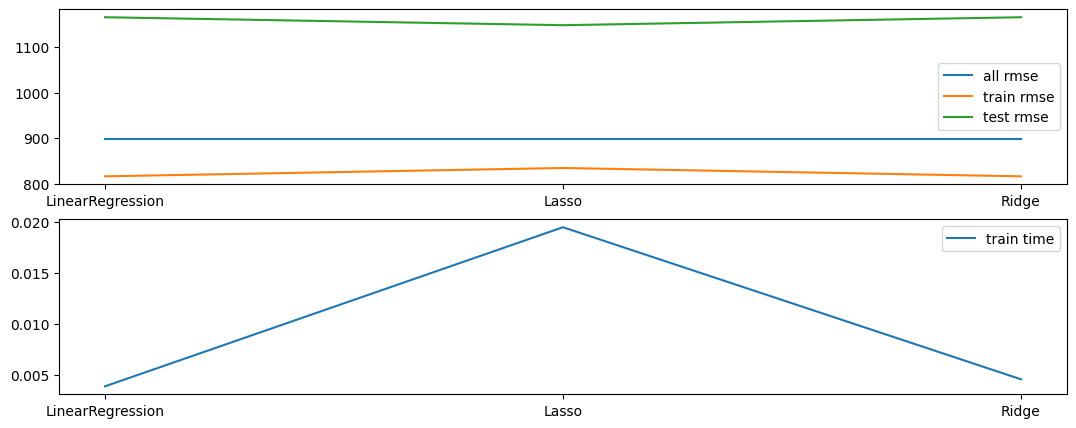

In [82]:
fig=plt.figure(figsize=(13,5))

cop1=fig.add_subplot(211)
cop1.plot(result_models["model"],result_models["all_rmse"],label="all rmse")
cop1.plot(result_models["model"],result_models["train_rmse"],label="train rmse")
cop1.plot(result_models["model"],result_models["test_rmse"],label="test rmse")
plt.legend()

cop2=fig.add_subplot(212)
cop2.plot(result_models["model"],result_models["time"],label="train time")
plt.legend()

plt.show()